In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("fraudTrain.csv")
df1 =pd.read_csv("fraudTest.csv")

In [3]:
df = [df, df1]
df = pd.concat(df)

In [4]:
df.shape

(1852394, 23)

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [7]:
df.describe().style.format('{:.2f}')

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,537193.44,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,366910.96,1309115265318020352.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,231549.00,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,463098.00,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,833575.75,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,1296674.00,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [8]:
df = df.rename(columns= {'trans_date_trans_time': 'transaction_date_time', 
                          'amt': 'Amount',
                          'lat': 'Latitude',
                          'long': 'Longitude',
                          'cc_num':'Credit_card_Number',
                          'first': 'First_name',
                          'last': "Last_name",
                          'merch_lat': 'Merchant_latitude',
                          'merch_long': 'Merchant_longitude',
                          }
                )

In [9]:
df.transaction_date_time = pd.to_datetime(df["transaction_date_time"])
df.dob = pd.to_datetime(df["dob"])

In [10]:
df["year"] = df["transaction_date_time"].dt.year
df["Birth_year"] = df["dob"].dt.year
df["Age"] = df["year"] - df["Birth_year"]
df["Age"]

0         31
1         41
2         57
3         52
4         33
          ..
555714    54
555715    21
555716    39
555717    55
555718    27
Name: Age, Length: 1852394, dtype: int64

In [11]:
df = df.drop(["Birth_year","year","Unnamed: 0","First_name","Last_name"], axis = 1)

In [12]:
df.isnull().sum()

transaction_date_time    0
Credit_card_Number       0
merchant                 0
category                 0
Amount                   0
gender                   0
street                   0
city                     0
state                    0
zip                      0
Latitude                 0
Longitude                0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
Merchant_latitude        0
Merchant_longitude       0
is_fraud                 0
Age                      0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [22]:
numerical_columns = [cols for cols in df.columns if df[cols].dtypes != 'O']
categorical_columns = [cols for cols in df.columns if cols not in numerical_columns]

In [24]:
numerical_columns

['transaction_date_time',
 'Credit_card_Number',
 'Amount',
 'zip',
 'Latitude',
 'Longitude',
 'city_pop',
 'dob',
 'unix_time',
 'Merchant_latitude',
 'Merchant_longitude',
 'is_fraud',
 'Age',
 'Distance']

In [25]:
categorical_columns

['merchant',
 'category',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [17]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Radius of the Earth in kilometers
    earth_radius = 6371.0

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = earth_radius * c

    return distance

df['Distance'] = df.apply(lambda row: haversine_distance(row['Merchant_latitude'], row['Merchant_longitude'], row['Latitude'], row['Longitude']), axis=1)


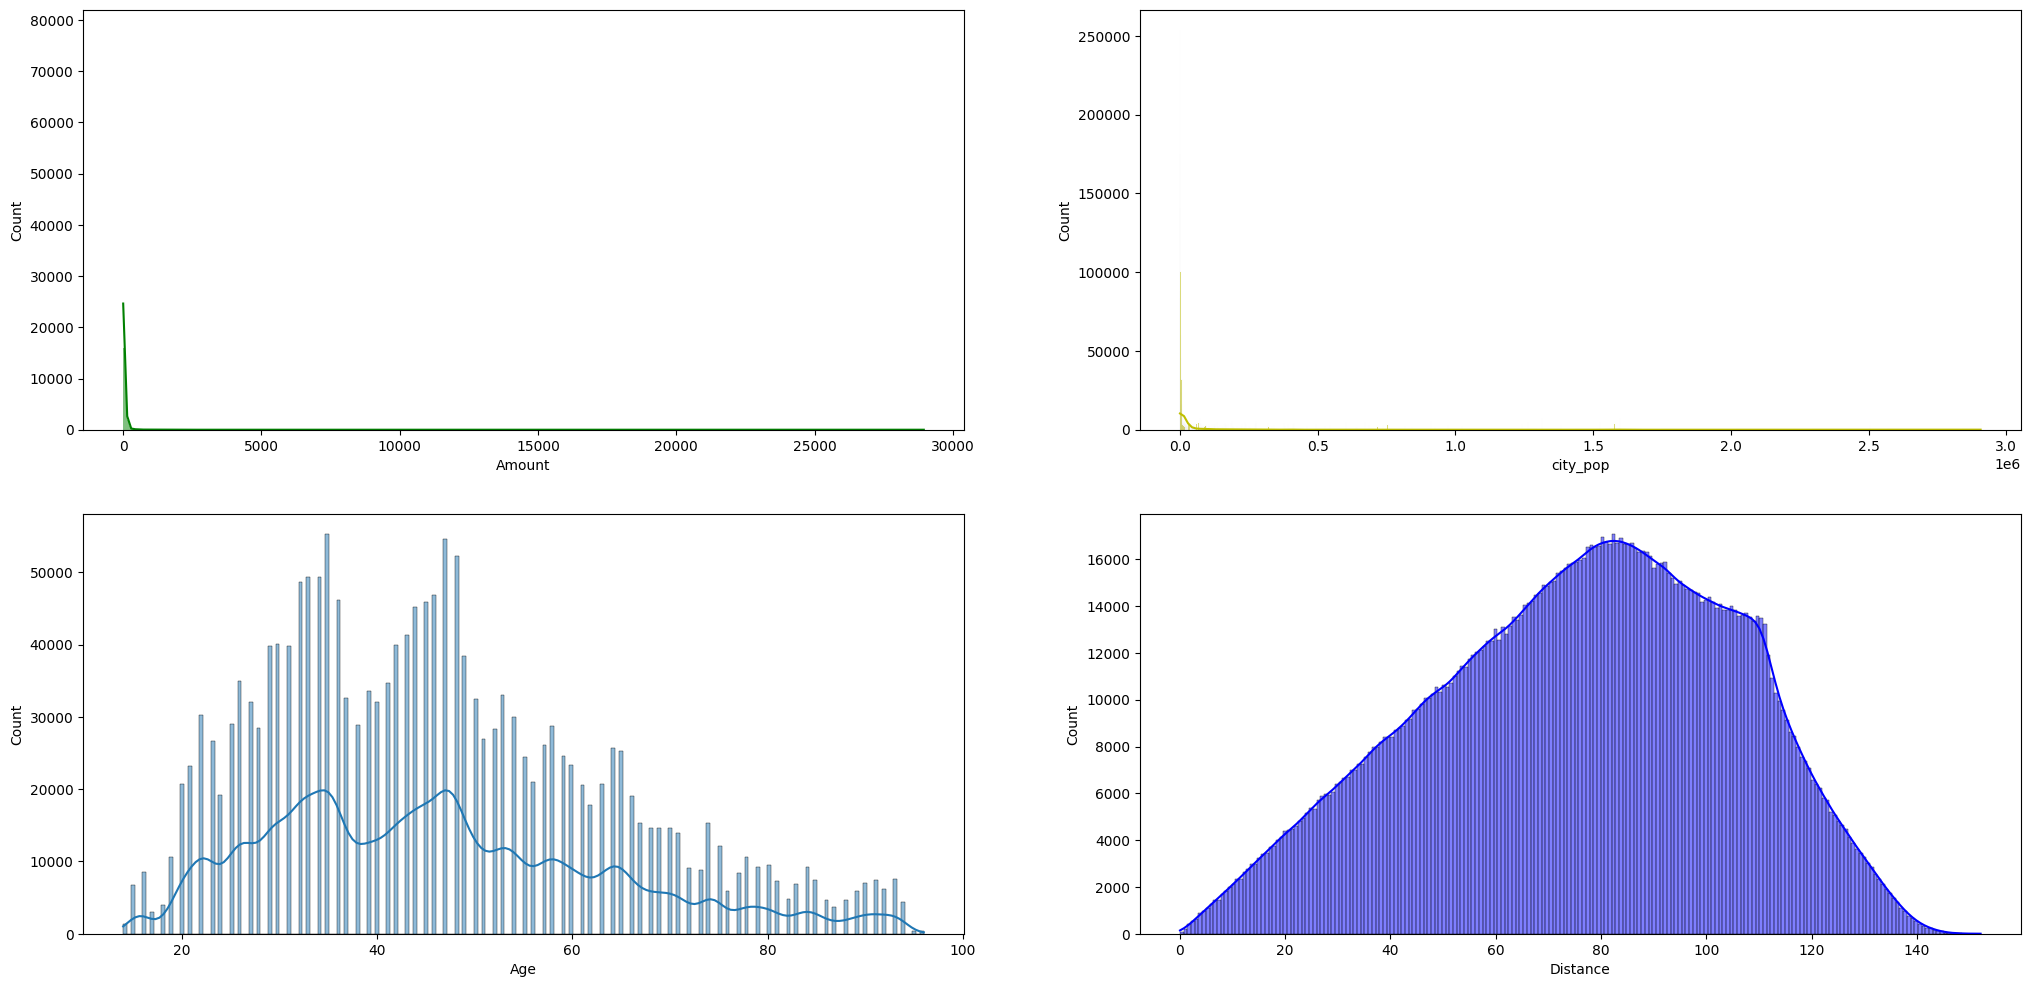

In [26]:
plt.subplots(nrows=2,ncols=2,figsize = (25,12))
plt.subplot(2,2,1)
ax = sns.histplot(data=df[numerical_columns]['Amount'],kde=True,color='g')
plt.subplot(2,2,2)
ax = sns.histplot(data=df[numerical_columns]['city_pop'],kde=True,color='y')
plt.subplot(2,2,3)
sns.histplot(data=df[numerical_columns]['Age'],kde=True)
plt.subplot(2,2,4)
ax = sns.histplot(data=df[numerical_columns]['Distance'],kde=True,color='b')


In [27]:
fraud_amount = df[df["is_fraud"]==1]
nonfraud_amount = df[df["is_fraud"]==0]

Text(0.5, 1.0, 'Non fraud Amount')

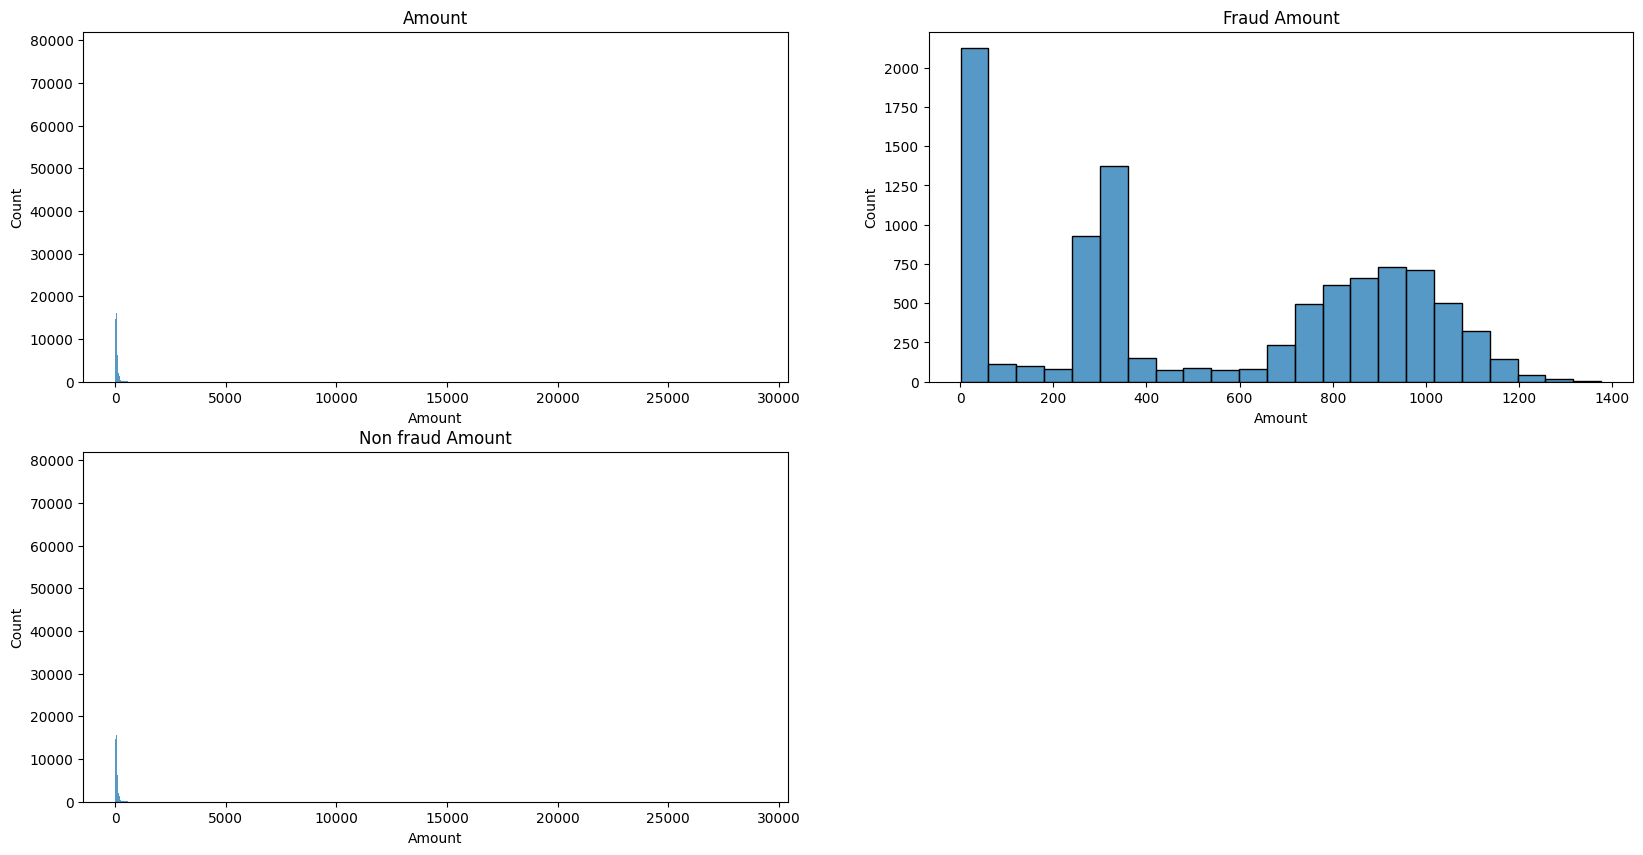

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
ax =sns.histplot(x = "Amount",data = df)
ax.set_title("Amount")

plt.subplot(2,2,2)
ax = sns.histplot(x = "Amount",data = fraud_amount)
ax.set_title("Fraud Amount")

plt.subplot(2,2,3)
ax = sns.histplot(x = "Amount",data = nonfraud_amount)
ax.set_title("Non fraud Amount")



In [33]:
df["transaction_year_month"]  =df["transaction_date_time"].dt.to_period('M')
df["transaction_day"] = df["transaction_date_time"].dt.day_name()
df["transaction_hour"] = df["transaction_date_time"].dt.hour

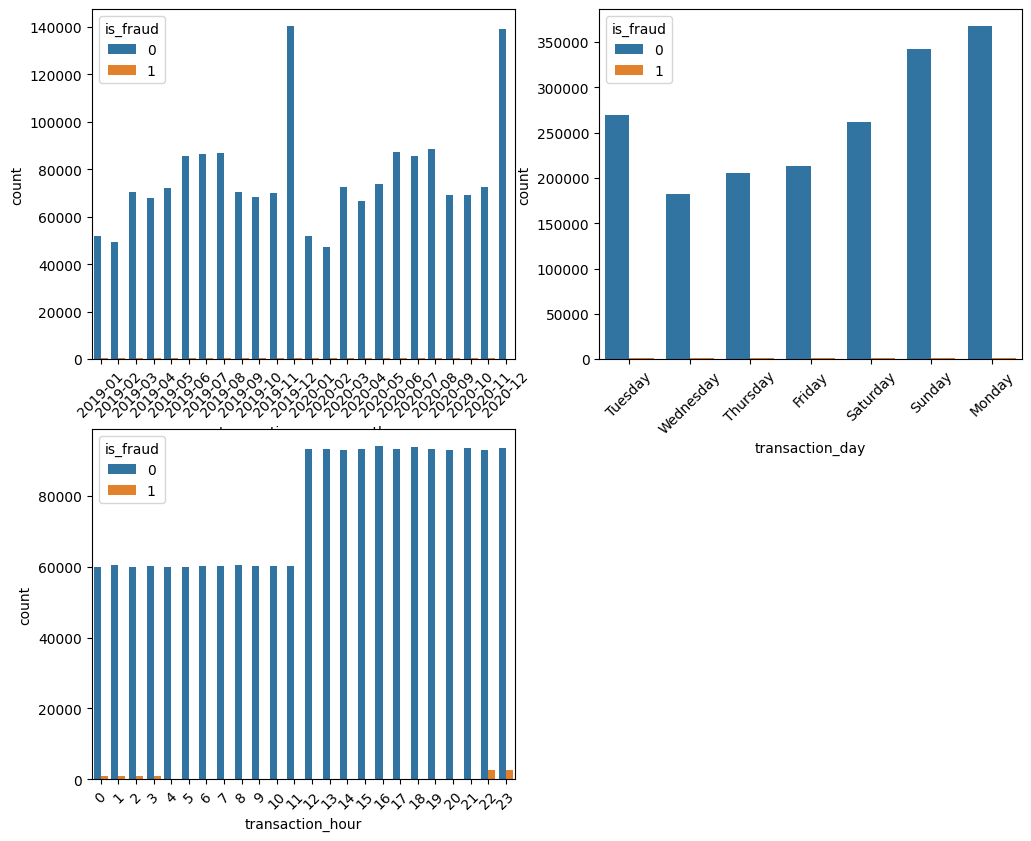

In [34]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(x = "transaction_year_month",hue = "is_fraud",data = df)
plt.xticks(rotation = 45)

plt.subplot(2,2,2)
sns.countplot(x = "transaction_day",hue = "is_fraud",data = df)
plt.xticks(rotation = 45)

plt.subplot(2,2,3)
sns.countplot(x = "transaction_hour",hue = "is_fraud",data = df)
plt.xticks(rotation = 45)

plt.show()

In [35]:
fraud_trans = df[df["is_fraud"]==1].groupby(["transaction_year_month"])[("trans_num","Credit_card_Number")].nunique().reset_index()
fraud_trans.columns = ["transaction_year_month","no_of_fraud_trans","no_of_cus"]
fraud_trans

C:\Users\rahil\AppData\Local\Temp\ipykernel_11060\2729508784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fraud_trans = df[df["is_fraud"]==1].groupby(["transaction_year_month"])[("trans_num","Credit_card_Number")].nunique().reset_index()


,transaction_year_month,no_of_fraud_trans,no_of_cus
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


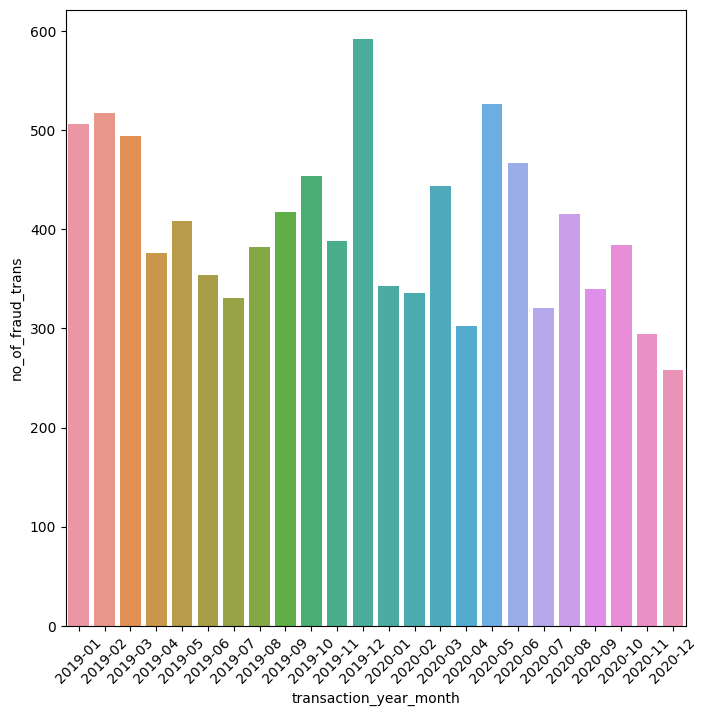

In [36]:
plt.figure(figsize = (8,8))
sns.barplot(x="transaction_year_month", y="no_of_fraud_trans", data=fraud_trans)
plt.xticks(rotation = 45)
plt.show()

In [37]:
nonfraud_trans = df[df["is_fraud"]==0].groupby(["transaction_year_month"])[("trans_num","Credit_card_Number")].nunique().reset_index()
nonfraud_trans.columns = ["transaction_year_month","no_of_trans","no_of_cus"]
nonfraud_trans

C:\Users\rahil\AppData\Local\Temp\ipykernel_11060\3062602855.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nonfraud_trans = df[df["is_fraud"]==0].groupby(["transaction_year_month"])[("trans_num","Credit_card_Number")].nunique().reset_index()


,transaction_year_month,no_of_trans,no_of_cus
0,2019-01,52019,908
1,2019-02,49349,908
2,2019-03,70445,908
3,2019-04,67702,908
4,2019-05,72124,908
5,2019-06,85710,908
6,2019-07,86265,908
7,2019-08,86977,908
8,2019-09,70234,908
9,2019-10,68304,908


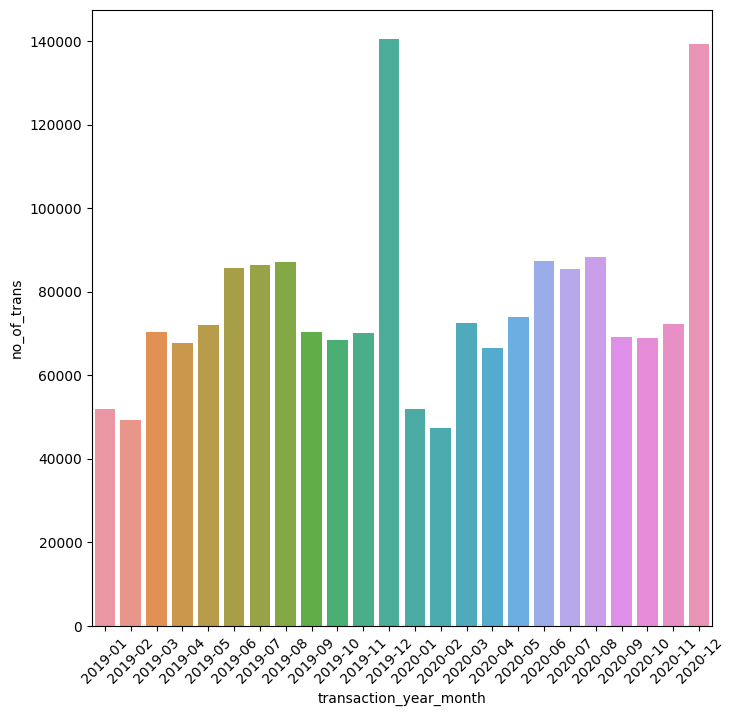

In [38]:
plt.figure(figsize = (8,8))
sns.barplot(x="transaction_year_month", y="no_of_trans", data=nonfraud_trans)
plt.xticks(rotation = 45)
plt.show()

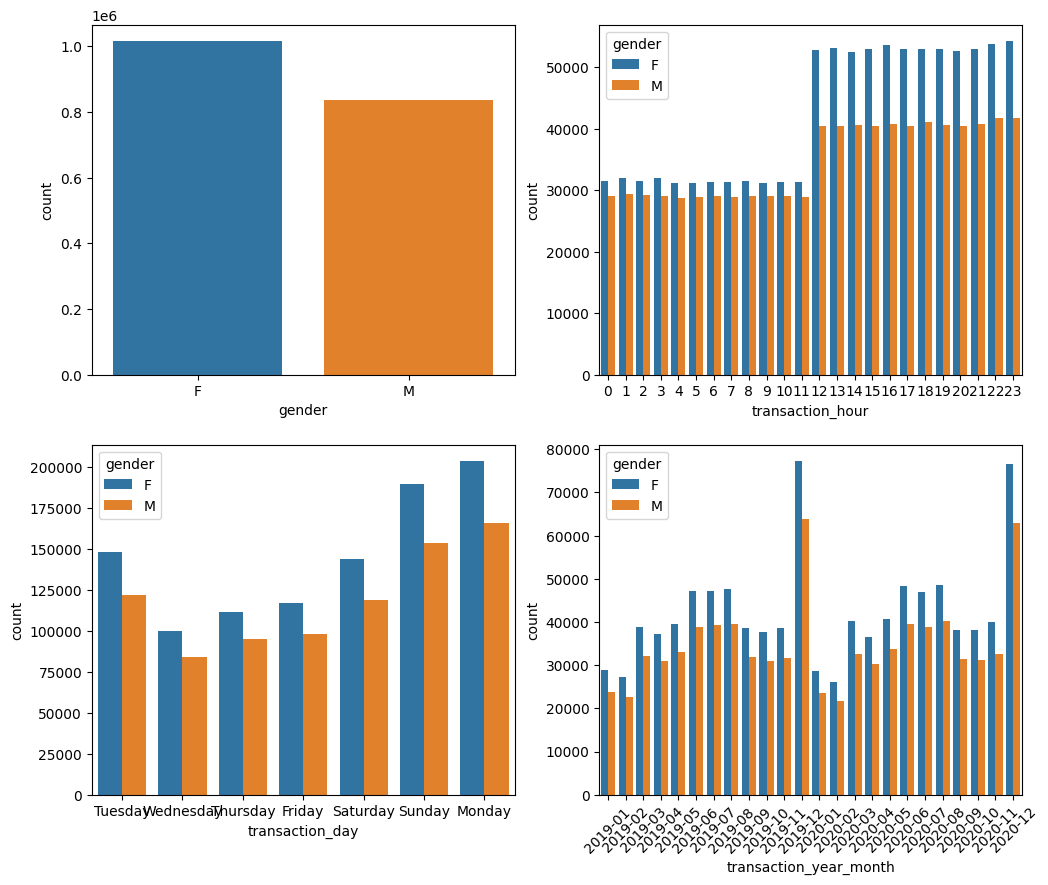

In [39]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.countplot(x = "gender",data = df)

plt.subplot(2,2,2)
sns.countplot(x = "transaction_hour", hue = "gender", data = df)


plt.subplot(2,2,3)
sns.countplot(x = "transaction_day", hue = "gender", data = df)

plt.subplot(2,2,4)
sns.countplot(x = "transaction_year_month", hue = "gender", data = df)
plt.xticks(rotation = 45)

plt.show()


In [40]:
df.Age.value_counts()

35    55353
47    54602
48    52272
34    49387
33    49326
      ...  
87     3722
17     3049
14     1318
95      398
96      337
Name: Age, Length: 83, dtype: int64

In [41]:
age_bins = [0, 30,45, 60, 75, float('inf')]
age_labels = ['<30', '30-45', '46-60', '61-75', '>75']
df["Age_group"] = pd.cut(df["Age"],bins = age_bins, labels = age_labels, right = False)

In [42]:
df["Age_group"].value_counts()

30-45    617092
46-60    513622
<30      318786
61-75    259128
>75      143766
Name: Age_group, dtype: int64

<AxesSubplot: xlabel='Age_group', ylabel='count'>

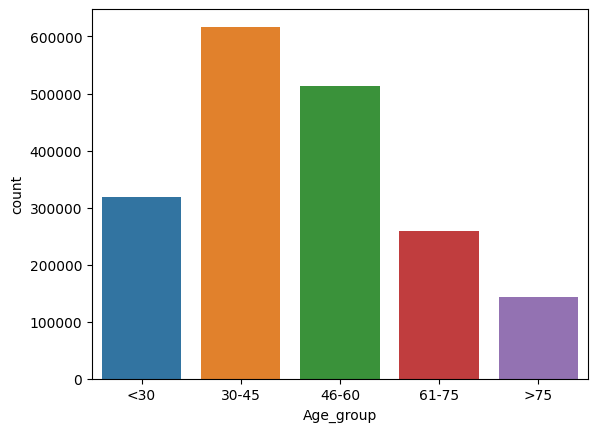

In [43]:
sns.countplot(x = "Age_group", data = df)

In [44]:
df_Age = df.groupby(["Age_group","is_fraud", "gender"])[("trans_num")].nunique().reset_index()
df_Age.columns = ["Age_group","is_fraud", "gender","trans_count"]
df_Age

,Age_group,is_fraud,gender,trans_count
0,<30,0,F,168620
1,<30,0,M,148502
2,<30,1,F,904
3,<30,1,M,760
4,30-45,0,F,347981
5,30-45,0,M,266593
6,30-45,1,F,1207
7,30-45,1,M,1311
8,46-60,0,F,276017
9,46-60,0,M,234747


<AxesSubplot: xlabel='Age_group', ylabel='trans_count'>

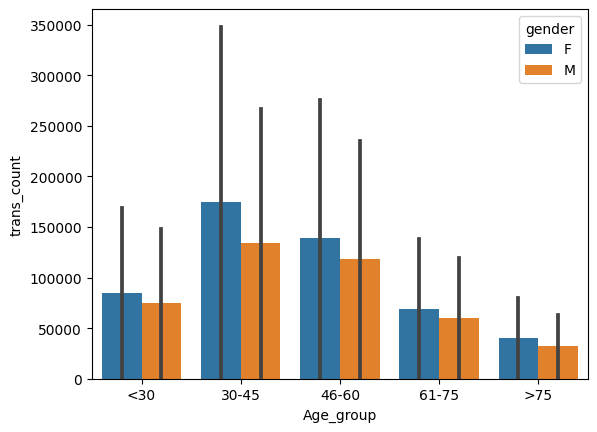

In [45]:
sns.barplot(x = "Age_group", y = "trans_count", hue = "gender" , data = df_Age)

In [46]:
trans_states = df.state.value_counts().head(20).index.tolist()
print(trans_states)
100*df[df.state.isin(trans_states)].state.value_counts(normalize=True)

['TX', 'NY', 'PA', 'CA', 'OH', 'MI', 'IL', 'FL', 'AL', 'MO', 'MN', 'AR', 'NC', 'VA', 'WI', 'SC', 'KY', 'IN', 'IA', 'OK']


TX    10.961858
NY     9.677414
PA     9.252292
CA     6.523111
OH     5.399284
MI     5.334292
IL     5.041503
FL     4.925052
AL     4.742394
MO     4.449281
MN     3.681776
AR     3.615163
NC     3.495470
VA     3.383801
WI     3.382342
SC     3.381775
KY     3.320997
IN     3.204141
IA     3.144578
OK     3.083476
Name: state, dtype: float64

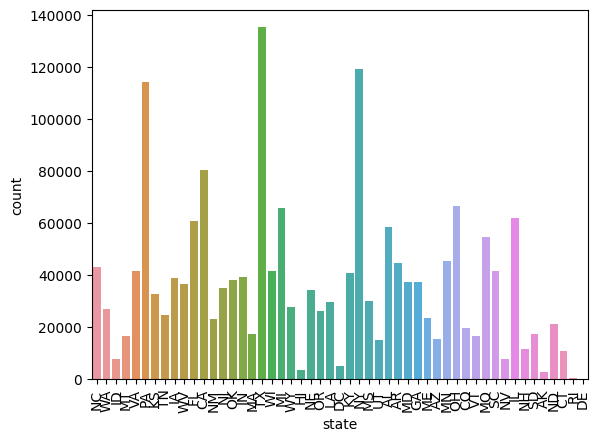

<Figure size 800x1500 with 0 Axes>

In [47]:
sns.countplot(x = "state", data = df)
plt.xticks(rotation = 90)
plt.figure(figsize = (8,15))
plt.show()

In [48]:
#constructing the state-transaction count distribution
df_state = df[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['state', 'state_count']

#creating the state-fraud distribution
df_fraud_state = df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['state', 'is_fraud', 'Transaction count']

df_fraud_state = df_fraud_state.merge(df_state[['state', 'state_count']], how='inner', on='state')

df_fraud_state['Transaction percentage'] = (df_fraud_state['Transaction count']/df_fraud_state['state_count'])*100

#viewing the top 20 states with high fraudulent transactions
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,state,is_fraud,Transaction count,state_count,Transaction percentage
16,DE,1,9,9,100.000000
78,RI,1,15,745,2.013423
1,AK,1,50,2963,1.687479
74,OR,1,197,26408,0.745986
60,NH,1,79,11727,0.673659
90,VA,1,273,41756,0.653798
84,TN,1,159,24913,0.638221
58,NE,1,216,34425,0.627451
46,MN,1,280,45433,0.616292
68,NY,1,730,119419,0.611293


In [49]:
df.city.nunique()
df.city.nunique()

906

In [50]:
cities = df.city.value_counts().head(20).index.tolist()
zip = df.zip.value_counts().head(20).index.tolist()

In [51]:

df_city = df[['city','trans_num']].groupby(['city']).count().reset_index()
df_city.columns = ['city', 'city_count']
df_city

df_fraud_city = df[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
df_fraud_city.columns = ['city', 'is_fraud', 'Transaction count']
df_fraud_city

df_fraud_city = df_fraud_city.merge(df_city[['city', 'city_count']], how='inner', on='city')

df_fraud_city['Transaction percentage'] = (df_fraud_city['Transaction count']/df_fraud_city['city_count'])*100

#viewing the top 20 cities with high fraudulent transaction volumes
df_fraud_city[df_fraud_city['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,city,is_fraud,Transaction count,city_count,Transaction percentage
1322,Rice,1,8,8,100.0
1106,Norfolk,1,7,7,100.0
1325,Ridge Spring,1,10,10,100.0
445,East China,1,9,9,100.0
1294,Queen Anne,1,13,13,100.0
1627,Waukau,1,10,10,100.0
1247,Pleasant Hill,1,8,8,100.0
528,Freeport,1,9,9,100.0
1231,Phelps,1,11,11,100.0
109,Beacon,1,11,11,100.0


In [52]:
df_zip = df[["zip", "trans_num"]].groupby(["zip"]).count().reset_index()
df_zip.columns = ["zip", "zip_count"]

df_zip1 = df.groupby(["zip","is_fraud"])[("trans_num")].count().reset_index()
df_zip1.columns = ["zip", "is_fraud","trans_count"]


df_zip = df_zip1.merge(df_zip, how = 'inner', on = 'zip')

df_zip["Trans_perc"] = 100*(df_zip["trans_count"]/df_zip["zip_count"])
df_zip
df_zip = df_zip[df_zip["is_fraud"]==1].sort_values(by = "Trans_perc", ascending = False).head(20)
df_zip

,zip,is_fraud,trans_count,zip_count,Trans_perc
1859,99921,1,14,14,100.0
126,10533,1,8,8,100.0
930,47842,1,12,12,100.0
941,48054,1,9,9,100.0
960,48436,1,8,8,100.0
1035,52658,1,6,6,100.0
1040,53045,1,9,9,100.0
1052,53559,1,10,10,100.0
234,14532,1,11,11,100.0
1082,54980,1,10,10,100.0


In [53]:
df.columns

Index(['transaction_date_time', 'Credit_card_Number', 'merchant', 'category',
       'Amount', 'gender', 'street', 'city', 'state', 'zip', 'Latitude',
       'Longitude', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'Merchant_latitude', 'Merchant_longitude', 'is_fraud', 'Age',
       'Distance', 'transaction_year_month', 'transaction_day',
       'transaction_hour', 'Age_group'],
      dtype='object')

In [54]:
df.job.nunique()

497

In [55]:
df_job = df.job.value_counts().head(20).index.tolist()
print(df_job)
filtered_df = df[df['job'].isin(df_job)]


['Film/video editor', 'Exhibition designer', 'Surveyor, land/geomatics', 'Naval architect', 'Materials engineer', 'Designer, ceramics/pottery', 'Environmental consultant', 'Financial adviser', 'Systems developer', 'IT trainer', 'Copywriter, advertising', 'Scientist, audiological', 'Chartered public finance accountant', 'Chief Executive Officer', 'Podiatrist', 'Comptroller', 'Magazine features editor', 'Agricultural consultant', 'Paramedic', 'Sub']


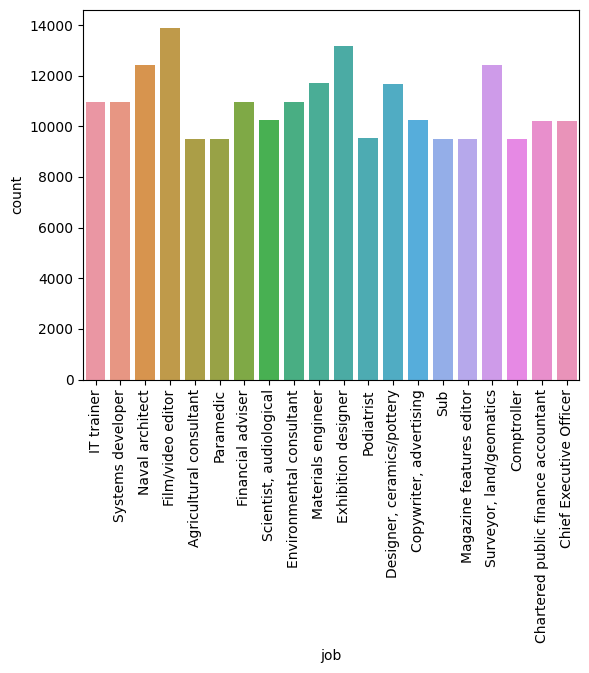

In [56]:
plot = sns.countplot(data = filtered_df, x = "job")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()


In [57]:
df_fraud_job = df[["job", "trans_num"]].groupby(["job"]).count().reset_index()
df_fraud_job.columns = ["job", "job_count"]


df_fraud_job1 = df.groupby(["job","is_fraud"])[("trans_num")].count().reset_index()
df_fraud_job1.columns = ["job", "is_fraud","trans_count"]


df_job1 = df_fraud_job1.merge(df_fraud_job, how = "inner", on = "job")
df_job1["trans_perc"] = 100*(df_job1["trans_count"]/df_job1["job_count"])
df_job1 = df_job1[df_job1["is_fraud"]==1].sort_values(by = "trans_perc", ascending = False).head(20)

In [58]:
df_job1

,job,is_fraud,trans_count,job_count,trans_perc
444,Homeopath,1,11,11,100.0
2,"Accountant, chartered",1,11,11,100.0
393,Forest/woodland manager,1,9,9,100.0
834,Software engineer,1,11,11,100.0
827,Ship broker,1,7,7,100.0
68,Armed forces technical officer,1,8,8,100.0
228,Dancer,1,19,19,100.0
796,Sales promotion account executive,1,14,14,100.0
39,Air traffic controller,1,17,17,100.0
99,Broadcast journalist,1,9,9,100.0


In [59]:
df_job1.loc[(df_job1.is_fraud == 1) & (df_job1['trans_perc'] >= 50)].job

444                            Homeopath
2                  Accountant, chartered
393              Forest/woodland manager
834                    Software engineer
827                          Ship broker
68        Armed forces technical officer
228                               Dancer
796    Sales promotion account executive
39                Air traffic controller
99                  Broadcast journalist
207           Contracting civil engineer
475                     Industrial buyer
478                  Information officer
340                      Engineer, water
335                       Engineer, site
118                      Careers adviser
651                    Personnel officer
947                   Veterinary surgeon
624        Operational investment banker
521                      Legal secretary
Name: job, dtype: object

In [60]:
df.category.value_counts(normalize = True)

gas_transport     0.101506
grocery_pos       0.095115
home              0.094721
shopping_pos      0.089864
kids_pets         0.087307
shopping_net      0.075212
entertainment     0.072403
food_dining       0.070573
personal_care     0.070225
health_fitness    0.066159
misc_pos          0.061666
misc_net          0.048939
grocery_net       0.035024
travel            0.031287
Name: category, dtype: float64

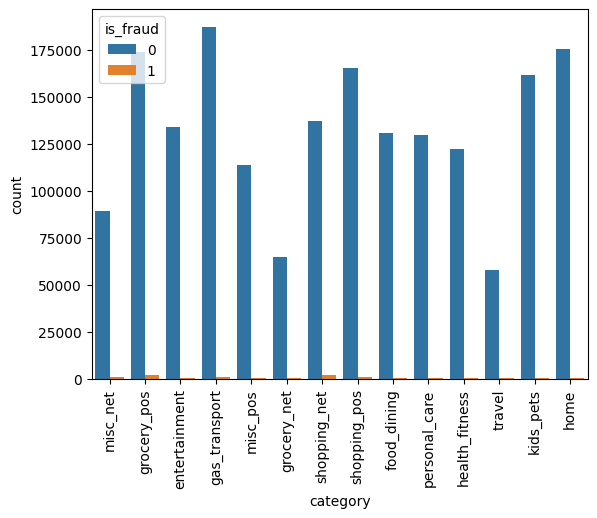

In [61]:
sns.countplot(x = "category",hue = "is_fraud", data = df)
plt.xticks(rotation = 90)
plt.show()

In [62]:
#constructing the category-transaction count distribution
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)

,category,is_fraud,Transaction count,category_count,Transaction percentage
23,shopping_net,1,2219,139322,1.592713
17,misc_net,1,1182,90654,1.303859
9,grocery_pos,1,2228,176191,1.264537
25,shopping_pos,1,1056,166463,0.634375
5,gas_transport,1,772,188029,0.410575
19,misc_pos,1,322,114229,0.281890
7,grocery_net,1,175,64878,0.269737
27,travel,1,156,57956,0.269170
21,personal_care,1,290,130085,0.222931
1,entertainment,1,292,134118,0.217719


In [63]:
df_fraud_category.head()

,category,is_fraud,Transaction count,category_count,Transaction percentage
0,entertainment,0,133826,134118,99.782281
1,entertainment,1,292,134118,0.217719
2,food_dining,0,130524,130729,99.843187
3,food_dining,1,205,130729,0.156813
4,gas_transport,0,187257,188029,99.589425


In [64]:
df_fraud_category.loc[(df_fraud_category.is_fraud == 1) & (df_fraud_category['Transaction percentage'] >= 1)].category

9      grocery_pos
17        misc_net
23    shopping_net
Name: category, dtype: object

In [65]:
high_trans_merchants = df.merchant.value_counts().head(20).index.tolist()
high_trans_merchants
filtered_df = df[df.merchant.isin(high_trans_merchants)]


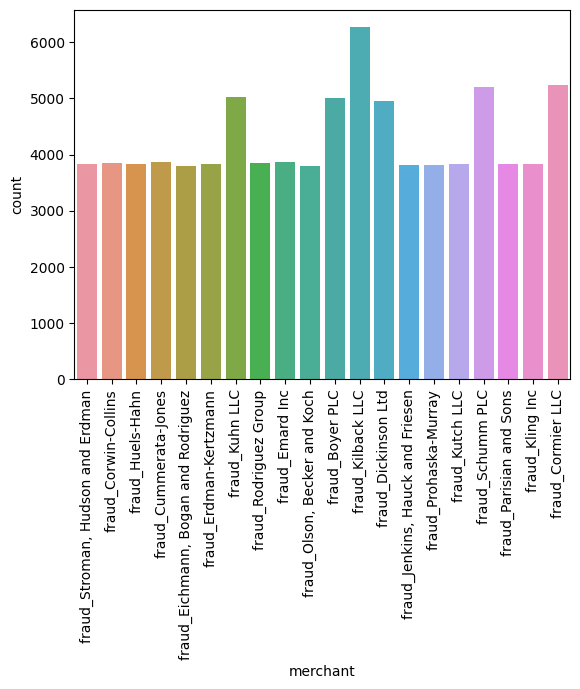

In [66]:
sns.countplot(data = filtered_df, x = "merchant")
plt.xticks(rotation = 90)
plt.show()

In [67]:
#constructing the merchant-transaction count distribution
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['merchant', 'merchant_count']

#creating the zip-fraud distribution
df_fraud_merchant = df[['merchant', 'trans_num', 'is_fraud']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['merchant', 'is_fraud', 'Transaction count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['merchant', 'merchant_count']], how='inner', on='merchant')

df_fraud_merchant['Transaction percentage'] = (df_fraud_merchant['Transaction count']/df_fraud_merchant['merchant_count'])*100

#viewing the top 20 merchant with high fraudulent transaction volumes
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

,merchant,is_fraud,Transaction count,merchant_count,Transaction percentage
673,fraud_Kozey-Boehm,1,60,2758,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,2.032086
1226,fraud_Terry-Huel,1,56,2864,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,1.878766
1105,"fraud_Schmeler, Bashirian and Price",1,52,2788,1.865136
691,fraud_Kuhic LLC,1,53,2842,1.864884
563,fraud_Jast Ltd,1,51,2757,1.849837
743,"fraud_Langworth, Boehm and Gulgowski",1,52,2817,1.845935
1051,"fraud_Romaguera, Cruickshank and Greenholt",1,51,2767,1.843151


In [68]:
df_fraud_merchant.head()

,merchant,is_fraud,Transaction count,merchant_count,Transaction percentage
0,fraud_Abbott-Rogahn,0,2643,2647,99.848886
1,fraud_Abbott-Rogahn,1,4,2647,0.151114
2,fraud_Abbott-Steuber,0,2521,2529,99.683669
3,fraud_Abbott-Steuber,1,8,2529,0.316331
4,fraud_Abernathy and Sons,0,2509,2513,99.840828


In [69]:
df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 2)].merchant

490    fraud_Herman, Treutel and Dickens
673                    fraud_Kozey-Boehm
Name: merchant, dtype: object

C:\Users\rahil\AppData\Local\Temp\ipykernel_11060\2764748287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Figure size 1000x1000 with 0 Axes>

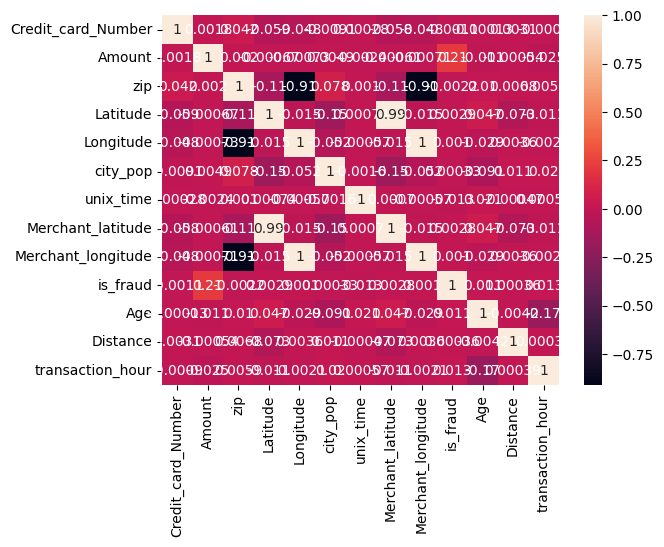

<Figure size 1000x1000 with 0 Axes>

In [70]:
correlation = df.corr()
sns.heatmap(correlation,annot =True)
plt.figure(figsize = (10,10))

In [71]:
df.head()

,transaction_date_time,Credit_card_Number,merchant,category,Amount,gender,street,city,state,zip,...,unix_time,Merchant_latitude,Merchant_longitude,is_fraud,Age,Distance,transaction_year_month,transaction_day,transaction_hour,Age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,1325376018,36.011293,-82.048315,0,31,78.597568,2019-01,Tuesday,0,30-45
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,1325376044,49.159047,-118.186462,0,41,30.212176,2019-01,Tuesday,0,30-45
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,1325376051,43.150704,-112.154481,0,57,108.206083,2019-01,Tuesday,0,46-60
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,1325376076,47.034331,-112.561071,0,52,95.673231,2019-01,Tuesday,0,46-60
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,1325376186,38.674999,-78.632459,0,33,77.556744,2019-01,Tuesday,0,30-45


In [74]:
df1 = df1.drop(["Credit_card_Number","transaction_date_time","street","city","job","state","zip","city_pop","dob","transaction_year_month","merchant","trans_num","Age_group"],axis = 1)

In [73]:
df1 = df.copy()



In [76]:
df1.columns

Index(['category', 'Amount', 'gender', 'Latitude', 'Longitude', 'unix_time',
       'Merchant_latitude', 'Merchant_longitude', 'is_fraud', 'Age',
       'Distance', 'transaction_day', 'transaction_hour'],
      dtype='object')

In [77]:
df1 = df1.drop(["unix_time","Latitude","Longitude","Merchant_latitude","Merchant_longitude"],axis =1)

In [79]:
df1.columns

Index(['category', 'Amount', 'gender', 'is_fraud', 'Age', 'Distance',
       'transaction_day', 'transaction_hour'],
      dtype='object')

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehot_columns = ["category","transaction_day"]
# df1= pd.get_dummies(df1, columns=onehot_columns)
# df1

In [80]:
import numpy as np
df1["gender"] = np.where(df1.gender == 'F' ,0,1)


In [81]:
category_to_value = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7,
}

In [82]:
df1.transaction_day = df.transaction_day.map(category_to_value)

In [83]:
category_frequencies = df_fraud_category['category'].value_counts(normalize=True)

# Create a dictionary mapping categories to their frequencies
category_to_frequency = category_frequencies.to_dict()

# Replace each category with its corresponding frequency in the 'Category' column
df1['category'] = df1['category'].map(category_to_frequency)


In [84]:
df1.category

0         0.071429
1         0.071429
2         0.071429
3         0.071429
4         0.071429
            ...   
555714    0.071429
555715    0.071429
555716    0.071429
555717    0.071429
555718    0.071429
Name: category, Length: 1852394, dtype: float64

In [85]:
df1.dtypes

category            float64
Amount              float64
gender                int32
is_fraud              int64
Age                   int64
Distance            float64
transaction_day       int64
transaction_hour      int64
dtype: object

In [86]:
from sklearn.utils import resample

# Assuming you have a DataFrame 'df' with features and target variable

# Separate the majority and minority classes
majority_class = df1[df1['is_fraud'] == 0]
minority_class = df1[df1['is_fraud'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
df1 = pd.concat([majority_class, upsampled_minority])

In [87]:
X = df1.drop("is_fraud", axis = 1)
y = df1["is_fraud"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_test)
accuracy = accuracy_score(y_train_pred,y_test)

In [93]:
accuracy

0.8529395005820122

In [94]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf_model = clf.fit(X_train, y_train)
clf_pred = clf_model.predict(X_test)
accuracy = accuracy_score(clf_pred,y_test)
accuracy


0.9987708554357765

In [95]:
from sklearn.ensemble import RandomForestClassifier
Random_model = RandomForestClassifier()
Random_model = Random_model.fit(X_train, y_train)
Random_model_pred = Random_model.predict(X_test)
accuracy = accuracy_score(Random_model_pred,y_test)
accuracy

0.999504814827879